In [22]:
import os
import os.path 
import pandas as pd
import re
import numpy as np
import math
import cv2 
from matplotlib import pyplot as plt
import imutils

In [23]:
def insertGambar(folder):
    data = []
    filenames = []
    labels = []
    for label in os.listdir(folder):
        for filename in os.listdir(folder+"/"+label):
            labels.append(label)
            img = cv2.imread(os.path.join(folder+"/"+label,filename))
            filenames.append(filename)
            if img is not None:
                data.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return data, filenames, labels


In [24]:
images, filename, labels = insertGambar("train")


In [25]:
def tampilFoto(img):
    plt.figure(figsize=(20,20))
    for i in range(len(img)):
        plt.subplot(1,len(img),i+1)
        plt.imshow(img[i], cmap='gray')

In [26]:
def green(img): # segmentasi interval Hijau
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (40, 40, 40), (70, 255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def red(img): # segmentasi interval Merah
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (0, 100, 20), (179, 255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def yellow(img): # segmentasi interval Kuning
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(hsv, (23,93,0), (40,255,255))
    imask = mask>0
    hasil = np.zeros_like(img, np.uint8)
    hasil[imask] = img[imask]

    return hasil

def segment(image): # segmentasi 3 Based Warna
    return green(image)+red(image)+yellow(image)

def rgb(image):
    image = image.transpose()
    rs = image[0]
    gs = image[1]
    bs = image[2]

    rmean = np.mean(rs)
    gmean = np.mean(gs)
    bmean = np.mean(bs)

    rmax= np.amax(rs)
    gmax= np.amax(gs)
    bmax= np.amax(bs)

    return [rmean, gmean, bmean, rmax, gmax, bmax]

In [27]:
def resize(img):
    result = cv2.resize(img, (300, 500), interpolation=cv2.INTER_CUBIC)
    return result

In [28]:
normalize = []
for image in images:
    image = cv2.normalize(image, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX) #
    normalize.append(resize(image))

In [29]:
# tampilFoto([normalize[0],normalize[600],normalize[1200],normalize[2000]])

yellow_424.jpg


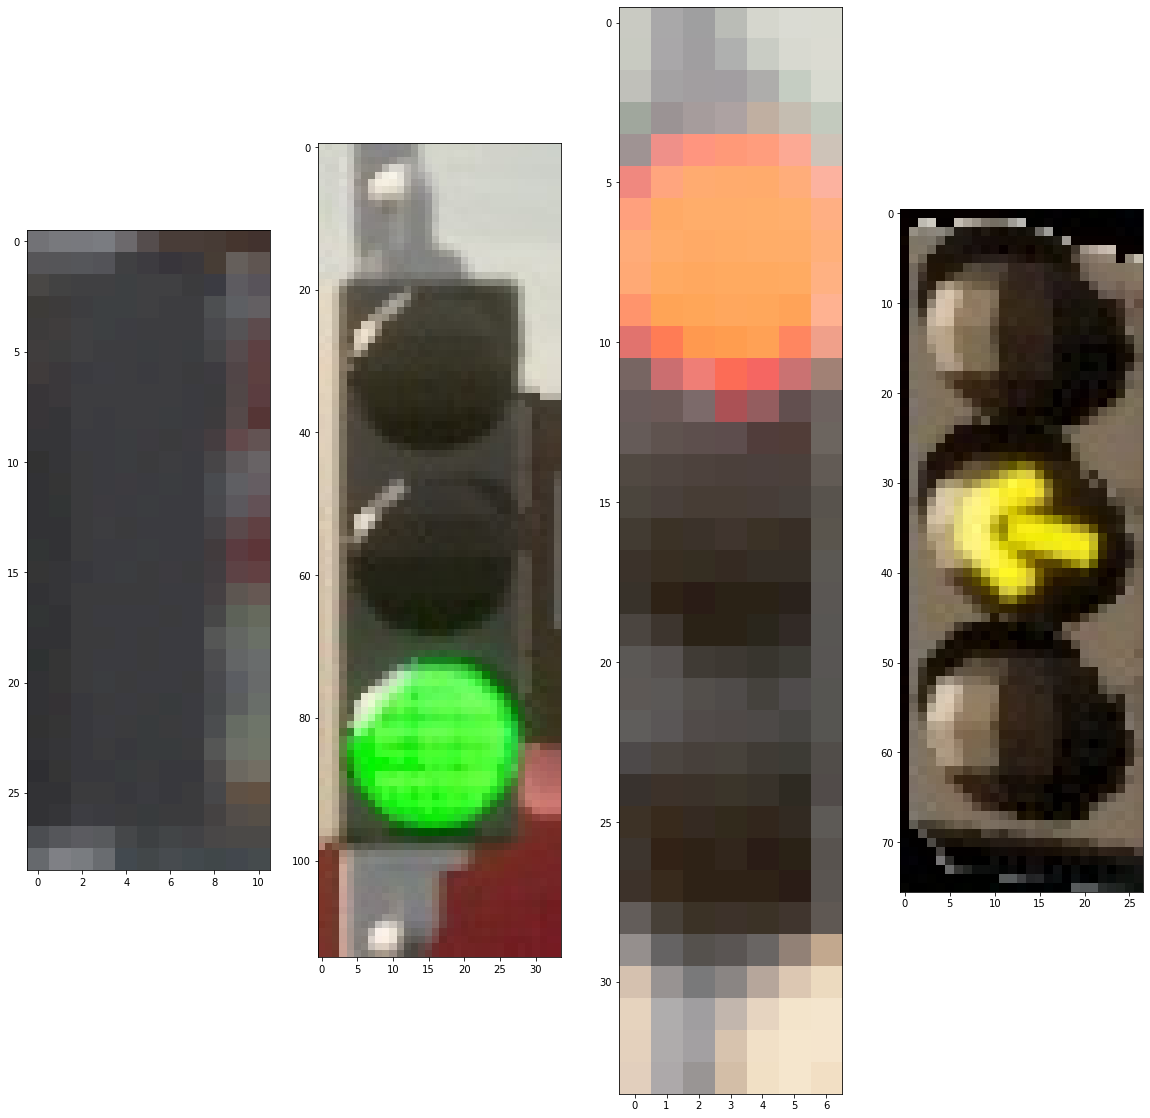

In [30]:
tampilFoto([images[0],images[600],images[1200],images[2001]])
print(filename[2001])

In [31]:
segments = []
for img in normalize:
    segments.append(segment(img))

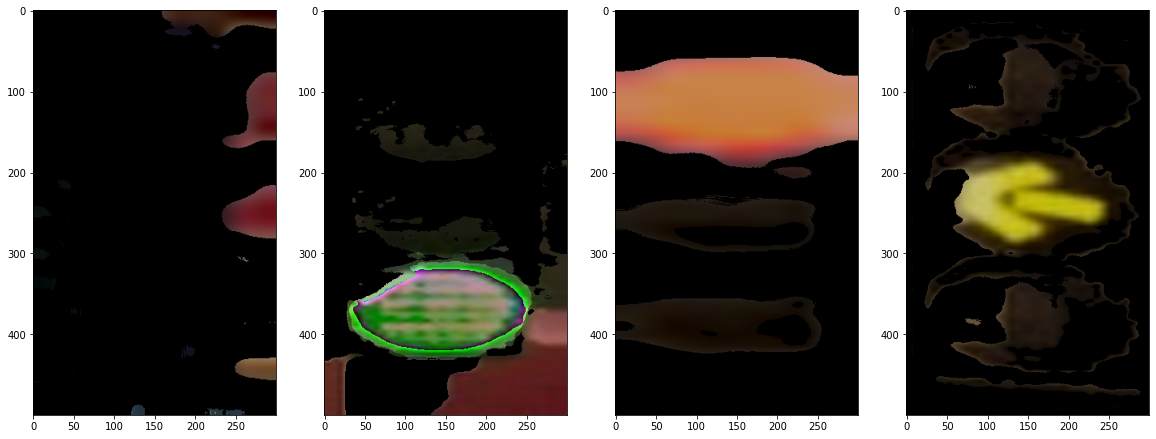

In [32]:
tampilFoto([segments[0],segments[600],segments[1200],segments[2001]])

In [33]:
# rgbsegments = []
# for image in segments:
#     image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
#     rgbsegments.append(image)

In [34]:
features = []
for image in segments:
    feature = rgb(image)
    features.append(feature)

In [35]:
filenames = pd.DataFrame(filename, columns=["filenames"])
labelsdf = pd.DataFrame(labels, columns=["labels"])

In [36]:
def export(data, namafile, column):
    glcm_df = pd.DataFrame(data, columns = column) #membuat data menjadi dataframe
    glcm_df.to_csv(namafile)

In [37]:
fitur = pd.DataFrame(features, columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"])
fitur.head()
# columns=["hmean", "smean", "vmean", "hmax", "smax", "vmax"]
# export(fitur, 'fitur.csv', columns)

,hmean,smean,vmean,hmax,smax,vmax
0,6.889187,3.463173,3.290887,-108,-92,-118
1,27.463833,20.840173,12.821940,-70,-100,113
2,3.100167,3.959867,1.306740,109,122,97
3,7.537113,8.020667,4.390860,-50,-4,-104
4,2.409573,3.158627,1.463513,-88,-26,-118


In [38]:
def exportCiri(filenames, fitur, label):
    glcm_df = pd.concat([filenames, fitur, label], axis=1) #membuat data menjadi dataframe
    glcm_df.to_csv('ciri.csv')

In [39]:
ciri = pd.concat([filenames, fitur, labelsdf], axis=1)
ciri.head()
# exportCiri(filenames, fitur, labelsdf)

,filenames,hmean,smean,vmean,hmax,smax,vmax,labels
0,back_1.png,6.889187,3.463173,3.290887,-108,-92,-118,back
1,back_10.png,27.463833,20.840173,12.821940,-70,-100,113,back
2,back_100.png,3.100167,3.959867,1.306740,109,122,97,back
3,back_101.png,7.537113,8.020667,4.390860,-50,-4,-104,back
4,back_102.png,2.409573,3.158627,1.463513,-88,-26,-118,back


In [40]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
    

In [41]:
x = fitur.values
y = labelsdf.values.ravel()
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=21)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelnb = KNeighborsClassifier(n_neighbors=5)

nbtrain = modelnb.fit(x_train, y_train)
y_pred = nbtrain.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

# from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, y_pred)
# arr = matrix.diagonal()/matrix.sum(axis=1)
# print(arr)

              precision    recall  f1-score   support

        back       1.00      0.93      0.96       101
       green       0.97      1.00      0.98       111
         red       0.98      0.99      0.99       106
      yellow       0.98      1.00      0.99       111

    accuracy                           0.98       429
   macro avg       0.98      0.98      0.98       429
weighted avg       0.98      0.98      0.98       429

0.9813519813519813
[0.93069307 1.         0.99056604 1.        ]
